# PACKAGE IMPORTS

<div class="alert alert-block alert-info">
These libraries and tools collectively provide a comprehensive set of capabilities for handling data (pandas, numpy), manipulating text (re, nltk), and performing advanced natural language processing tasks (nltk). They are widely used in data science, machine learning, and text analytics projects due to their efficiency and versatility.








In [158]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform, randint
from wordcloud import WordCloud


# DATA LOADING

In [197]:
# Load the data
train_data = pd.read_csv('/content/Data/processed/train.csv')
test_data = pd.read_csv('/content/Data/processed/train.csv')

In [160]:
# Display the first few rows of the train dataset
(train_data.head())


,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


# Data Cleaning

<div class="alert alert-block alert-info">
<b>Data cleaning</b>  refers to the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability for analysis. It involves several steps, including handling missing or incomplete data, correcting data format issues, removing duplicate records, and dealing with outliers or anomalies.
</div>    


In [161]:
# Check for missing values
(train_data.isnull().sum())

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

In [162]:
# Summary statistics of the dataset
(train_data.describe())


,headlines,description,content,url,category
count,5520,5520,5520,5520,5520
unique,5512,5508,5513,5514,5
top,International Education Day 2024: Know why it ...,The university has removed the requirements of...,Grand Slam fever grips tennis fans all over th...,https://indianexpress.com/article/education/kc...,education
freq,2,2,5,2,1520


# Exploratory Data Analysis (EDA)

In [163]:
print("Dataset shape:", train_data.shape)
print(train_data.info())

Dataset shape: (5520, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB
None


visualizing the distribution of the category column and analyzing the text data.  
EDA: Category Distribution

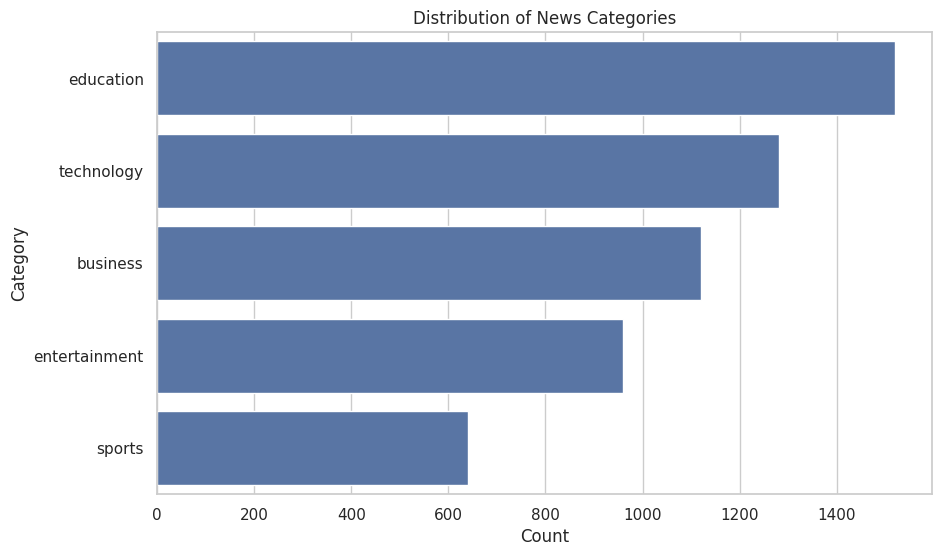

In [164]:
# Plot the distribution of the category column
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=train_data, order=train_data['category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


EDA: Text Length Analysis

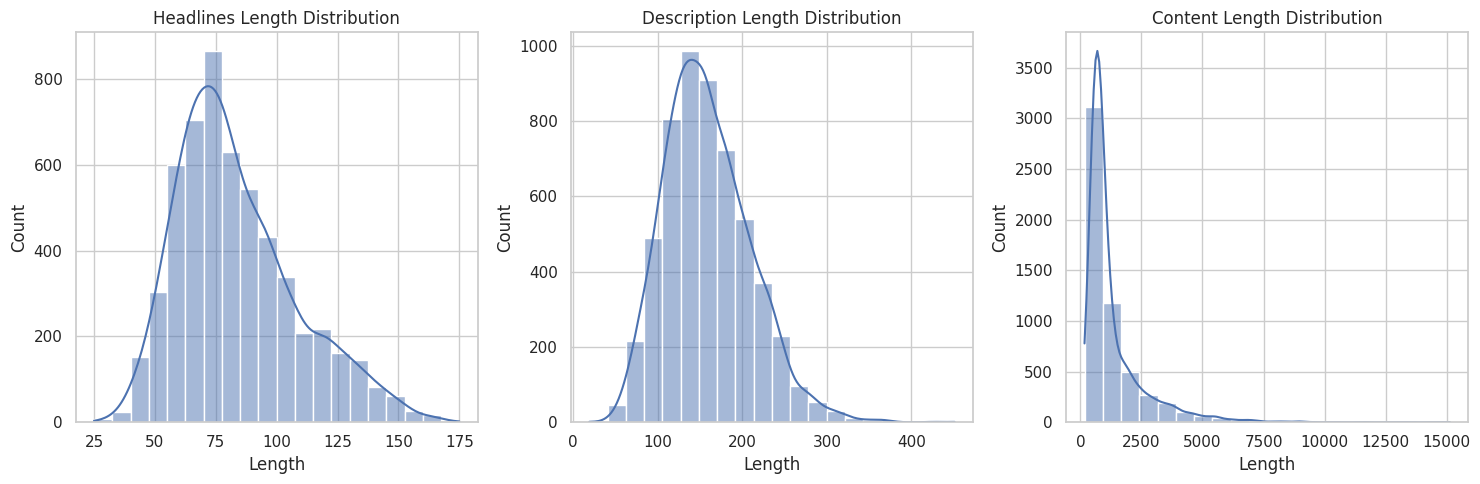

In [165]:
# Calculate the length of each text field
train_data['headlines_length'] = train_data['headlines'].apply(len)
train_data['description_length'] = train_data['description'].apply(len)
train_data['content_length'] = train_data['content'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_data['headlines_length'], bins=20, kde=True)
plt.title('Headlines Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 2)
sns.histplot(train_data['description_length'], bins=20, kde=True)
plt.title('Description Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 3)
sns.histplot(train_data['content_length'], bins=20, kde=True)
plt.title('Content Length Distribution')
plt.xlabel('Length')

plt.tight_layout()
plt.show()


# Implementing Data Cleaning and Preprocessing

<div class="alert alert-block alert-info">  
This section covers the process of data cleaning, which involves preparing text data for analysis by removing errors and inconsistencies. It includes downloading NLTK packages, loading datasets, and cleaning the text by removing noise, punctuation,converting to lowercase, and removing contractions. The text is then tokenized, stop words are removed, and words are stemmed and lemmatized. Finally, the processed text is reassembled into strings, with an option to save the cleaned datasets to CSV files.


In [166]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    #text = contractions.fix(text) # Remove contractions
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [ps.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(tokens)

# Apply cleaning function to the text fields
train_data['headlines'] = train_data['headlines'].apply(clean_text)
train_data['description'] = train_data['description'].apply(clean_text)
train_data['content'] = train_data['content'].apply(clean_text)

# Display cleaned text
train_data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,headlines,description,content,url,category,headlines_length,description_length,content_length
0,rbi revis definit politicallyexpos person kyc ...,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,https://indianexpress.com/article/business/ban...,business,69,180,1725
1,ndtv q net profit fall rs crore impact lower r...,ndtv consolid revenu oper rs crore rs crore ye...,broadcast new delhi televis ltd monday report ...,https://indianexpress.com/article/business/com...,business,93,112,986
2,akasa air well capitalis grow much faster ceo ...,initi share sale open public subscript juli bi...,homegrown server maker netweb technolog india ...,https://indianexpress.com/article/business/mar...,business,66,159,2069
3,india current account deficit declin sharpli g...,current account deficit cad per cent gdp usd b...,india current account deficit declin sharpli p...,https://indianexpress.com/article/business/eco...,business,87,115,1063
4,state borrow cost soar highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,https://indianexpress.com/article/business/eco...,business,64,109,1494


Text Length Distribution by Category

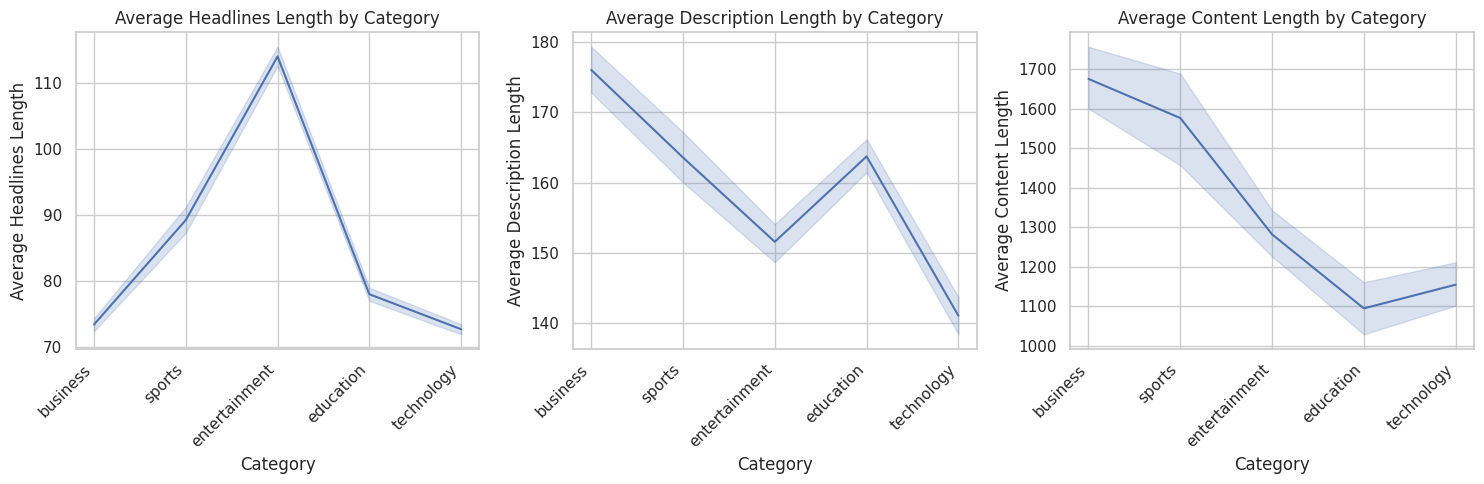

In [167]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=train_data, x='category', y='headlines_length', estimator='mean')
plt.title('Average Headlines Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Headlines Length')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels

plt.subplot(1, 3, 2)
sns.lineplot(data=train_data, x='category', y='description_length', estimator='mean')
plt.title('Average Description Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Description Length')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels

plt.subplot(1, 3, 3)
sns.lineplot(data=train_data, x='category', y='content_length', estimator='mean')
plt.title('Average Content Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Content Length')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels

plt.tight_layout()
plt.show()

Most Common Words in Each Category

In [168]:
from collections import Counter

def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

categories = train_data['category'].unique()
for category in categories:
    print(f"Most common words in {category}:")
    top_words = get_top_n_words(train_data[train_data['category'] == category]['content'], 10)
    for word, freq in top_words:
        print(f"{word}: {freq}")
    print("\n")


Most common words in business:
cent: 67.55681379209612
subscrib: 54.88772488553387
rs: 52.03886366472885
said: 44.34773121711704
crore: 40.05369795605143
india: 38.8095015881851
bank: 38.01770257185565
stori: 29.366387967276015
market: 27.511844982320625
year: 26.68686332941668


Most common words in sports:
india: 22.864033050339355
test: 19.744502080327603
said: 18.343563058485227
play: 17.186400058051323
cricket: 17.09880002584684
team: 16.364020123403307
australia: 15.893144960011455
world: 15.620305524528057
match: 14.927494066957625
game: 13.819958597699012


Most common words in entertainment:
film: 49.07982401311743
latest: 37.81253853800643
news: 36.89521843080195
updat: 36.54748546080993
actor: 29.70325254893282
stori: 29.27624547897761
regist: 29.035845341779762
said: 28.26306054096092
rs: 25.81019534750265
crore: 23.366811992522905


Most common words in education:
student: 63.30423435288994
exam: 58.67858400356936
univers: 52.421786050254056
institut: 43.21267385814917
res

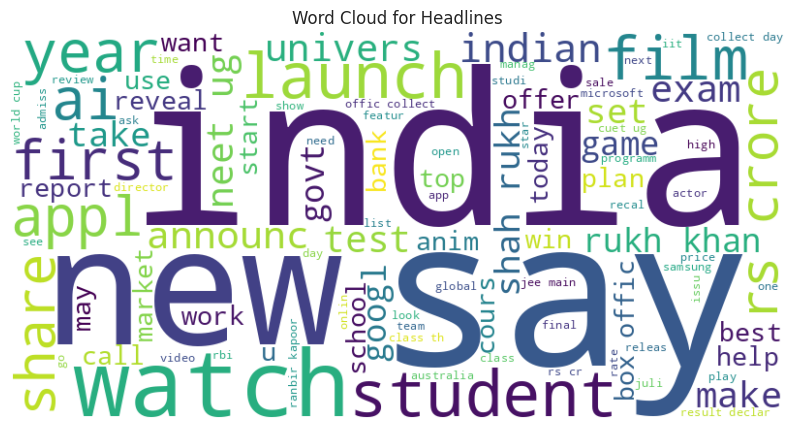

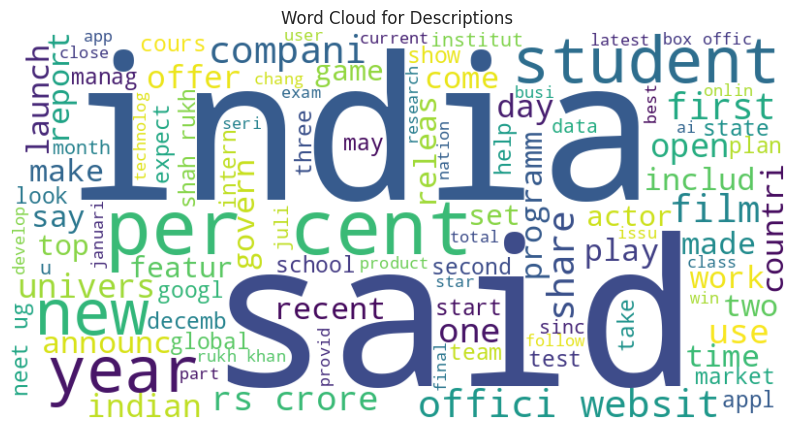

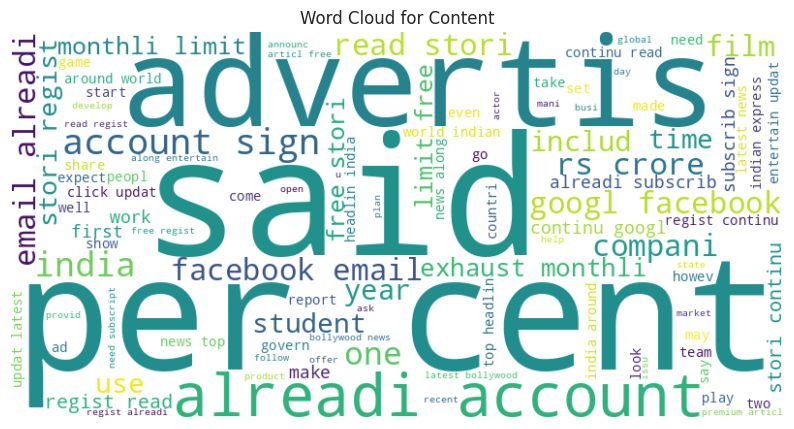

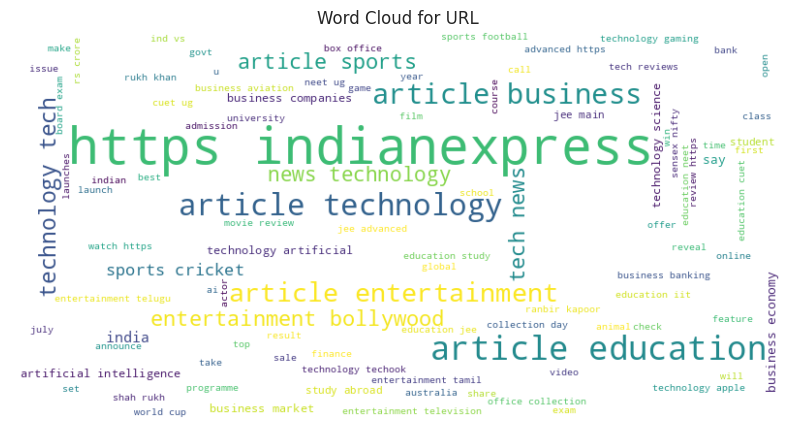

In [169]:
# Word cloud
def generate_word_cloud(text_column, title):
    all_text = ' '.join(text_column)
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {title}')
    plt.axis('off')
    plt.show()

generate_word_cloud(train_data['headlines'], 'Headlines')
generate_word_cloud(train_data['description'], 'Descriptions')
generate_word_cloud(train_data['content'], 'Content')
generate_word_cloud(train_data['url'], 'URL')

# Preprocessing Tasks for Classification

We have already cleaned the text data. We will now convert text data into numerical representations using TF-IDF vectorization. This step was covered previously, so we will move to model training.

Text Vectorization using TF-IDF

In [170]:
# Combine text fields into a single field for vectorization
train_data['combined_text'] = train_data['headlines'] + ' ' + train_data['description'] + ' ' + train_data['url'] + ' ' + train_data['content']

In [171]:
# Extract features and target
X = train_data['combined_text']
y = train_data['category']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [172]:
# # Vectorize the cleaned text fields
# tfidf_vectorizer = TfidfVectorizer()

# # Fit and transform the cleaned content
# X_vector = tfidf_vectorizer.fit_transform(X)

# # Split the data into training and validation sets
# from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [173]:
 print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(4416,) (1104,) (4416,) (1104,)


#  Model Training

>Logistic Regression  

 >Naive Bayes

 >Support Vector Machine (SVM)

 >Random Forest

 >Neural Network (MLPClassifier)

In [174]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Neural Network': MLPClassifier(max_iter=1000)
}

In [175]:
# Train and evaluate models using a pipeline
results = {}
f1_scores = []
accuracies = []

In [176]:
for model_name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = pipeline.predict(X_val)

    # Calculate evaluation metrics
    model_accuracy = accuracy_score(y_val, y_pred)
    model_f1 = f1_score(y_val, y_pred, average='weighted')
    model_report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)

    # Store results
    results[model_name] = {
        'accuracy': model_accuracy,
        'f1_score': model_f1,
        'classification_report': model_report
    }

    # Append f1 score and accuracy for plotting
    f1_scores.append(model_f1)
    accuracies.append(model_accuracy)

In [177]:
# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print(f"Classification Report:\n{metrics['classification_report']}\n")

Model: Logistic Regression
Accuracy: 0.9918478260869565
F1 Score: 0.9918562938811766
Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.99      0.99       245
    education       1.00      0.99      1.00       274
entertainment       0.99      0.99      0.99       178
       sports       0.99      0.99      0.99       137
   technology       0.99      0.99      0.99       270

     accuracy                           0.99      1104
    macro avg       0.99      0.99      0.99      1104
 weighted avg       0.99      0.99      0.99      1104


Model: Naive Bayes
Accuracy: 0.980072463768116
F1 Score: 0.9799887001141391
Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.97      0.97       245
    education       0.97      1.00      0.99       274
entertainment       0.98      1.00      0.99       178
       sports       0.99      0.94      0.97       137
   technology     

# MODEL ANALYSIS

Logistic Regression performs very well with high accuracy and F1 score. It shows strong performance across all classes, particularly notable for its balanced precision and recall.

Naive Bayes achieves the highest accuracy and F1 score among all models evaluated. It demonstrates excellent precision and recall across all classes, indicating robust performance in classifying news articles.

SVM shows strong performance with high accuracy and F1 score. It performs consistently well across most classes, although slightly lower than Naive Bayes in overall metrics.

 Random Forest performs well with decent accuracy and F1 score. It demonstrates good performance in some classes but shows slightly lower metrics compared to Naive Bayes and Logistic Regression.

Naive Bayes stands out as the top-performing model in this evaluation, achieving the highest accuracy and F1 score. It consistently shows strong precision and recall across all classes, making it the recommended choice for this classification task based on the provided data and evaluation results.

# MODEL PERFORMANCE

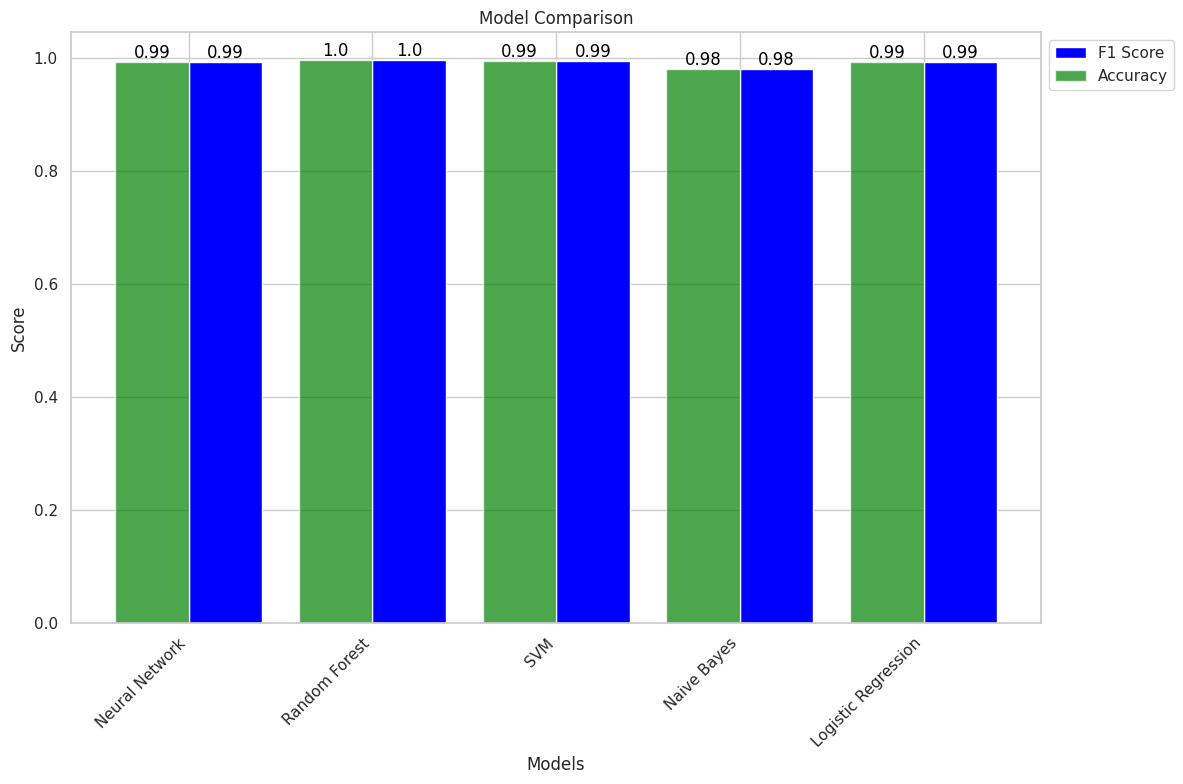

In [178]:
# Plotting
plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# Define the width of each bar
bar_width = 0.4

# Positions of the models on the x-axis
positions = range(len(results))

# Plot F1 Score bars
bars1 = plt.bar([pos - bar_width/2 for pos in positions], f1_scores, width=bar_width, color='Blue', label='F1 Score')

# Plot Accuracy bars
bars2 = plt.bar([pos + bar_width/2 for pos in positions], accuracies, width=bar_width, color='Green', alpha=0.7, label='Accuracy')

# Label models on the x-axis with slanted text
plt.xticks(positions, list(results.keys()), rotation=45, ha='right')

plt.xlabel('Models')  # Y-axis label
plt.ylabel('Score')  # Y-axis label
plt.title('Model Comparison')  # Plot title

# Add numbers on top of bars
for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2., yval1, round(yval1, 2), ha='center', va='bottom', color='black')

    yval2 = bar2.get_height()
    plt.text(bar2.get_x() + bar2.get_width()/2., yval2, round(yval2, 2), ha='center', va='bottom', color='black')

# Adjust legend position
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # Place legend outside the bars

plt.gca().invert_xaxis()  # Invert x-axis to display models from right to left
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()


#Model Evaluation on the test Set

In [179]:
test_data.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [180]:
# Apply cleaning function to the text fields
test_data['headlines'] = train_data['headlines'].apply(clean_text)
test_data['description'] = train_data['description'].apply(clean_text)
test_data['content'] = train_data['content'].apply(clean_text)
test_data['url'] = train_data['url'].apply(clean_text)

# Display cleaned text
test_data.head()

,headlines,description,content,url,category
0,rbi revi definit politicallyexpo person kyc purpo,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,httpsindianexpresscomarticlebusinessbankingand...,business
1,ndtv q net profit fall rs crore impact lower r...,ndtv consolid revenu oper rs crore rs crore ye...,broadcast new delhi televi ltd monday report p...,httpsindianexpresscomarticlebusinesscompaniesn...,education
2,akasa air well capitali grow much faster ceo v...,initi share sale open public subscript juli bi...,homegrown server maker netweb technolog india ...,httpsindianexpresscomarticlebusinessmarketnetw...,entertainment
3,india current account deficit declin sharpli g...,current account deficit cad per cent gdp usd b...,india current account deficit declin sharpli p...,httpsindianexpresscomarticlebusinesseconomyind...,technology
4,state borrow cost soar highest far fiscal,price shot reflect over higher risk aver inves...,state forc pay nose weekli auction debt tuesda...,httpsindianexpresscomarticlebusinesseconomysta...,business


In [181]:
test_data.isna().sum()

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

In [182]:
# Ensure no missing values in combined_text
# test_data['combined_text'].fillna('', inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB


In [183]:
# Combine text fields into a single field for vectorization
test_data['combined_text'] = test_data['headlines'] + ' ' + test_data['description'] + ' ' + test_data['url'] + ' ' + test_data['content']

# Extract features and target
X_test = test_data['combined_text']
y_test = test_data['category']

# Encode the target variable using the same LabelEncoder fitted on training data
y_test_encoded = label_encoder.transform(y_test)

In [184]:
# Initialize models (assuming they are already defined)
models_test = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state = 42),
    'Naive Bayes': MultinomialNB(random_state = 42),
    'SVM': SVC(random_state = 42),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state = 42),
    'Neural Network': MLPClassifier(max_iter=1000,random_state = 42)
}

In [185]:
X_test

0       rbi revi definit politicallyexpo person kyc pu...
1       ndtv q net profit fall rs crore impact lower r...
2       akasa air well capitali grow much faster ceo v...
3       india current account deficit declin sharpli g...
4       state borrow cost soar highest far fiscal pric...
                              ...                        
1995    rambha say rajinikanth act angri hug salman kh...
1996    main atal hoon pankaj tripathi drop first song...
1997    kareena kapoor saif ali khan vacat pataudi pal...
1998    tiger box offic collect day earli report salma...
1999    mammootti darshana rajendran malayalam actor s...
Name: combined_text, Length: 2000, dtype: object

In [186]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [205]:
# Example function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, label_encoder):
    # Create a pipeline with TF-IDF vectorizer and the model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

    return accuracy, f1, report

In [206]:
# Now evaluate on the test set
results_test = {}
f1_scores_test = []
accuracies_test = []

for model_name, model in models_test.items():
    model_accuracy, model_f1_test, model_report = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, label_encoder)

    # Store results
    results_test[model_name] = {
        'accuracy': model_accuracy,
        'f1_score': model_f1_test,  # Corrected variable name
        'classification_report': model_report
    }

    # Extract specific metrics from the report
    accuracy = model_report['accuracy']
    macro_precision = model_report['macro avg']['precision']
    macro_recall = model_report['macro avg']['recall']
    macro_f1 = model_report['macro avg']['f1-score']

    # Print or use the metrics as needed
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Macro Precision: {macro_precision}")
    print(f"Macro Recall: {macro_recall}")
    print(f"Macro F1-score: {macro_f1}")
    print()

    # Append f1 score and accuracy for plotting
    f1_scores_test.append(model_f1_test)
    accuracies_test.append(model_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Logistic Regression
Accuracy: 0.1915
Macro Precision: 0.14314170074952168
Macro Recall: 0.1915
Macro F1-score: 0.13187858867414295

Model: Naive Bayes
Accuracy: 0.194
Macro Precision: 0.2002946183467293
Macro Recall: 0.194
Macro F1-score: 0.1417972968684364

Model: SVM
Accuracy: 0.193
Macro Precision: 0.1530507835252672
Macro Recall: 0.193
Macro F1-score: 0.13206617970239973

Model: Random Forest
Accuracy: 0.1955
Macro Precision: 0.27398909897879065
Macro Recall: 0.19549999999999998
Macro F1-score: 0.1358989738306203

Model: Neural Network
Accuracy: 0.194
Macro Precision: 0.180133542585391
Macro Recall: 0.194
Macro F1-score: 0.132756085778404



In [207]:
# Print test results (optional)
for model_name, metrics_test in results_test.items():
    print(f"Model: {model_name}")
    print(f"Test Accuracy: {metrics_test['accuracy']}")
    print(f"Test F1 Score: {metrics_test['f1_score']}")
    print(f"Test Classification Report:\n{metrics_test['classification_report']}")
    print("\n")

Model: Logistic Regression
Test Accuracy: 0.1915
Test F1 Score: 0.13187858867414298
Test Classification Report:
{'business': {'precision': 0.20664869721473494, 'recall': 0.575, 'f1-score': 0.3040317250495704, 'support': 400}, 'education': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 400}, 'entertainment': {'precision': 0.18828451882845187, 'recall': 0.1125, 'f1-score': 0.14084507042253522, 'support': 400}, 'sports': {'precision': 0.16692913385826771, 'recall': 0.265, 'f1-score': 0.20483091787439614, 'support': 400}, 'technology': {'precision': 0.15384615384615385, 'recall': 0.005, 'f1-score': 0.009685230024213076, 'support': 400}, 'accuracy': 0.1915, 'macro avg': {'precision': 0.14314170074952168, 'recall': 0.1915, 'f1-score': 0.13187858867414295, 'support': 2000}, 'weighted avg': {'precision': 0.14314170074952168, 'recall': 0.1915, 'f1-score': 0.13187858867414298, 'support': 2000}}


Model: Naive Bayes
Test Accuracy: 0.194
Test F1 Score: 0.1417972968684364
Test Classi

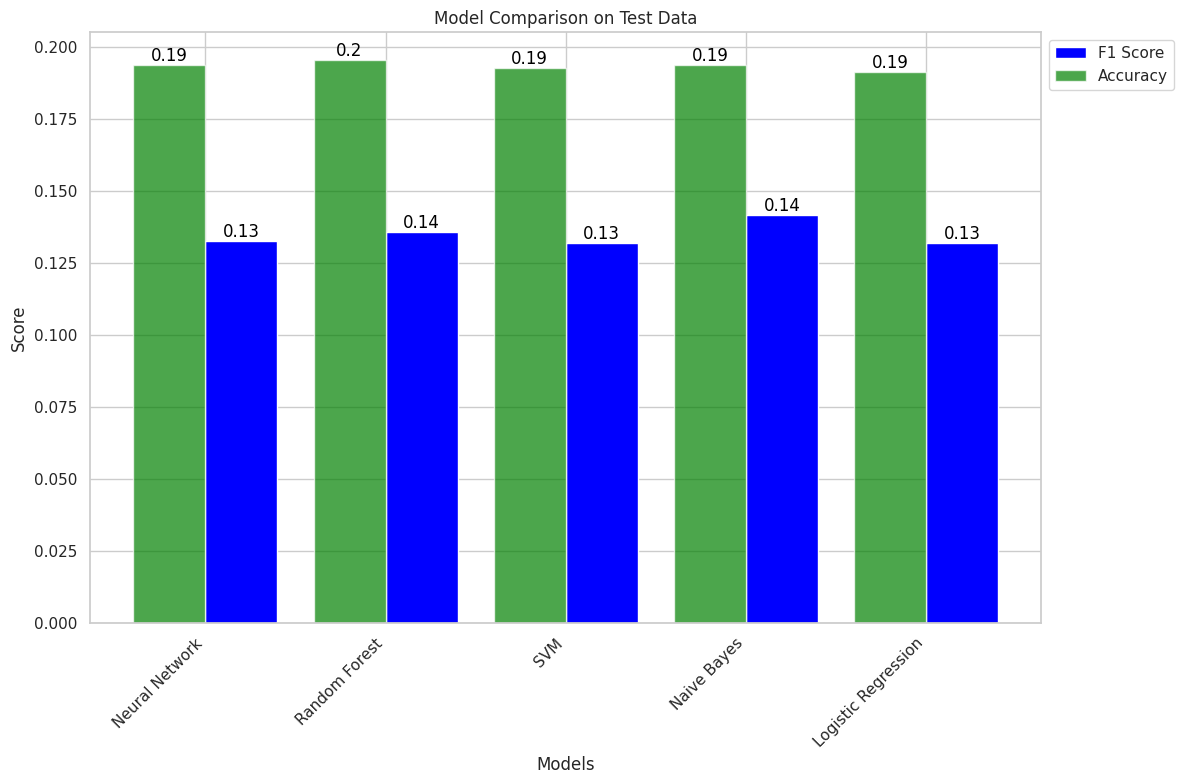

In [208]:
import matplotlib.pyplot as plt

# Assuming results_test, f1_scores_test, accuracies_test are already populated from your test evaluation

# Plotting
plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# Define the width of each bar
bar_width = 0.4

# Positions of the models on the x-axis
positions = range(len(results_test))

# Plot F1 Score bars
bars1 = plt.bar([pos - bar_width/2 for pos in positions], f1_scores_test, width=bar_width, color='Blue', label='F1 Score')

# Plot Accuracy bars
bars2 = plt.bar([pos + bar_width/2 for pos in positions], accuracies_test, width=bar_width, color='Green', alpha=0.7, label='Accuracy')

# Label models on the x-axis with slanted text
plt.xticks(positions, list(results_test.keys()), rotation=45, ha='right')

plt.xlabel('Models')  # X-axis label
plt.ylabel('Score')  # Y-axis label
plt.title('Model Comparison on Test Data')  # Plot title

# Add numbers on top of bars
for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2., yval1, round(yval1, 2), ha='center', va='bottom', color='black')

    yval2 = bar2.get_height()
    plt.text(bar2.get_x() + bar2.get_width()/2., yval2, round(yval2, 2), ha='center', va='bottom', color='black')

# Adjust legend position
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # Place legend outside the bars

plt.gca().invert_xaxis()  # Invert x-axis to display models from right to left
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()
